In [0]:
# author: Asmaa ~ 2019
# ----------------------

# import libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
class mnistCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') > 0.98):
      print('\nReached 0.98 accuracy so stop training!')
      self.model.stop_training = True

In [0]:
# load data and assign it 
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# get info about data
print('dimensions of training images:', training_images.shape)
print('dimensions of training labels:', training_labels.shape)
print('dimensions of test images:', test_images.shape)
print('dimensions of test labels:', test_labels.shape)

dimensions of training images: (60000, 28, 28)
dimensions of training labels: (60000,)
dimensions of test images: (10000, 28, 28)
dimensions of test labels: (10000,)


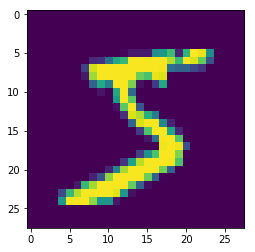

In [5]:
# visualize a sample of the data to understand better

# show as an image
plt.imshow(training_images[0])

In [0]:
# data normalization
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [7]:
# intialize a callback object
callback = mnistCallback()

# initialize the model
model = Sequential()

# set the structure of the network

# add input layer, 27*27 images will be flattened
model.add(Flatten())

# add a hidden layer with 128 units and set the activation function
model.add(Dense(units = 128, activation = tf.nn.relu))

# add output layer with 10 units (number of categories in fashion mnist) and set activation function
model.add(Dense(units = 10, activation = tf.nn.softmax))

# set functional properties
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

W0808 12:54:11.439963 140082358904704 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
# start training
model.fit(training_images, training_labels, epochs=100, callbacks=[callback])

Epoch 1/100
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2582 - acc: 0.9263
Epoch 2/100
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1150 - acc: 0.9665
Epoch 3/100
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0793 - acc: 0.9758
Epoch 4/100
59520/60000 [============================>.] - ETA: 0s - loss: 0.0590 - acc: 0.9816
Reached 0.98 accuracy so stop training!
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0591 - acc: 0.9816


In [9]:
# evaluate the model
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.0840 - acc: 0.9763


[0.083970616981294, 0.9763]